In [2]:
using MGVInference
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Plots

In [6]:
polyfit_model = "../test/test_models/polyfit.jl"
open(polyfit_model, "r") do io
    map(println, readlines(io))
end
include(polyfit_model)

# This file is a part of MGVInference.jl, licensed under the MIT License (MIT).

using Distributions
using Random
using ValueShapes

_x1_grid = [Float64(i)/10 for i in 1:25]
_x2_grid = [Float64(i)/10 + 0.1 for i in 1:15]
_common_grid = sort(vcat(_x1_grid, _x2_grid))

function _line(x_grid, p)
    p[1]*10 .+ p[2]*40 .* x_grid .+ p[3]*600 .* x_grid.^2 .+ p[4]*80 .* x_grid.^3
end

function full_model(p)
    dist1 = Product(Normal.(_line(_x1_grid, p), p[5]^2*60))
    dist2 = Product(Normal.(_line(_x2_grid, p), p[5]^2*60))
    NamedTupleDist(a=dist1,
                   b=dist2)
end

true_params =  [
 -0.3
 -1.5
 0.2
 -0.5
 0.3]

starting_point = [
  0.2
  0.5
  -0.1
  0.3
 -0.6
]

export full_model, true_params, starting_point


In [7]:
display(true_params)
display(starting_point)
data = rand(full_model(true_params), 1)[1];

5-element Array{Float64,1}:
 -0.3
 -1.5
  0.2
 -0.5
  0.3

5-element Array{Float64,1}:
  0.2
  0.5
 -0.1
  0.3
 -0.6

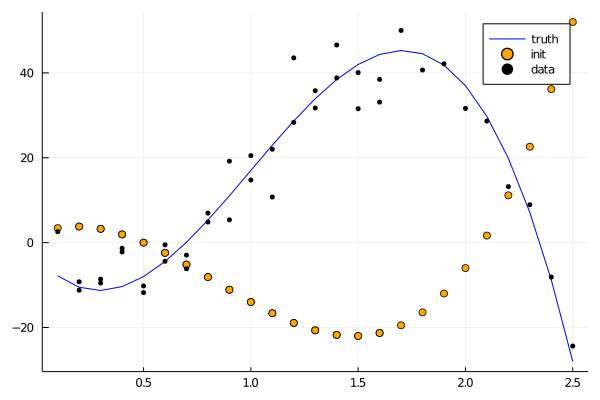

In [10]:
init_plots =() -> let
    truth = _line(_common_grid, true_params)
    plot!(_common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(_common_grid, _line(_common_grid, starting_point), markercolor=:orange, label="init")
    scatter!(vcat(_x1_grid, _x2_grid), MGVInference.unshaped(data), markercolor=:black, markersize=3, label="data")
end
plot()
init_plots()

In [11]:
first_iteration = mgvi_kl_optimize_step(full_model, data, starting_point)

display(hcat(first_iteration, true_params))

5×2 Array{Float64,2}:
  0.133475  -0.3
 -0.703307  -1.5
  0.127274   0.2
 -0.336488  -0.5
 -2.09038    0.3

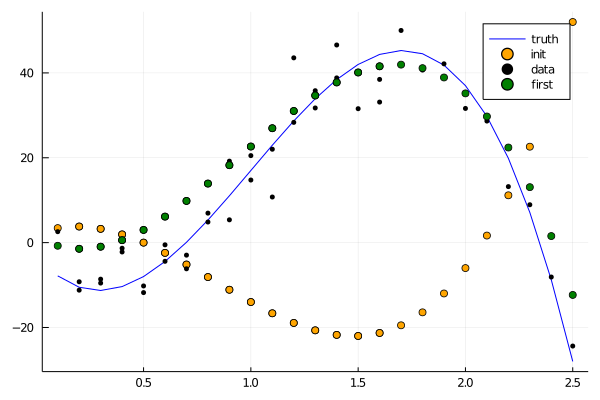

In [13]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    scatter!(_common_grid, _line(_common_grid, params), markercolor=:green, label=label)
end
    
plot()
init_plots()
plot_iteration(first_iteration, "first")

In [14]:
plot_iteration_light = (params, counter) -> let
    scatter!(_common_grid, _line(_common_grid, params), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#25 (generic function with 1 method)

5×2 Array{Float64,2}:
  0.133475  -0.3
 -0.703307  -1.5
  0.127274   0.2
 -0.336488  -0.5
 -2.09038    0.3

5×2 Array{Float64,2}:
 -0.501205  -0.3
 -0.759355  -1.5
  0.175481   0.2
 -0.540853  -0.5
 -1.73141    0.3

5×2 Array{Float64,2}:
 -0.597343  -0.3
 -0.908283  -1.5
  0.238264   0.2
 -0.78981   -0.5
 -2.49455    0.3

5×2 Array{Float64,2}:
 -0.153065   -0.3
 -0.209672   -1.5
 -0.0180368   0.2
  0.0216376  -0.5
 -2.23358     0.3

5×2 Array{Float64,2}:
 -0.250039   -0.3
 -0.358082   -1.5
  0.0835008   0.2
 -0.147068   -0.5
 -1.62446     0.3

5×2 Array{Float64,2}:
  0.24928   -0.3
 -1.42154   -1.5
  0.214806   0.2
 -0.590461  -0.5
 -1.35415    0.3

5×2 Array{Float64,2}:
 -0.189597   -0.3
 -1.29375    -1.5
  0.177901    0.2
 -0.448797   -0.5
  0.0002522   0.3

5×2 Array{Float64,2}:
 -0.0223297  -0.3
 -1.45732    -1.5
  0.187998    0.2
 -0.468132   -0.5
  0.30079     0.3

5×2 Array{Float64,2}:
  0.0207302  -0.3
 -1.45547    -1.5
  0.18996     0.2
 -0.475781   -0.5
  0.271631    0.3

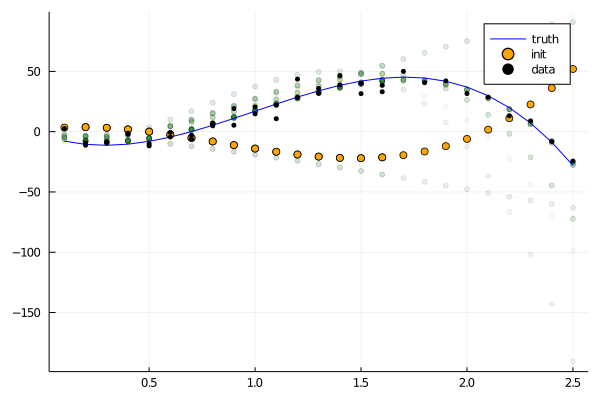

In [25]:
plt = scatter()
next_iteration = first_iteration
for i in 1:8
    display(hcat(next_iteration, true_params))
    next_iteration = mgvi_kl_optimize_step(full_model, data, next_iteration; residual_sampler=ImplicitResidualSampler)
    plot_iteration_light(next_iteration, i)
end
display(hcat(next_iteration, true_params))

init_plots()
display(plt)

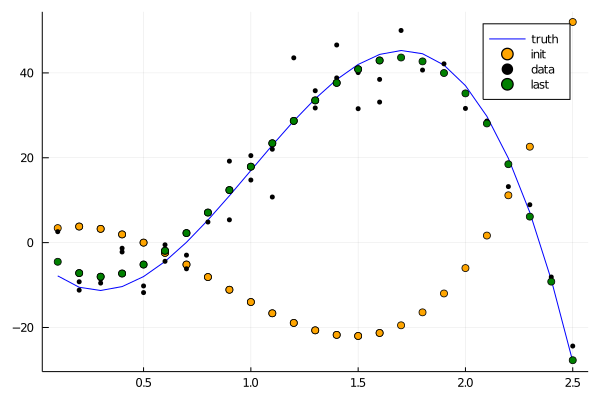

In [26]:
plot()
init_plots()
plot_iteration(next_iteration, "last")